# Clustering Small Set of News Sources

Junita Sirait

For case study purposes

In [1]:
import json
import csv
import pandas as pd
import numpy as np
import statistics

import tldextract

from collections import Counter, defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.preprocessing import StandardScaler

from sklearn import preprocessing

from sklearn.metrics import silhouette_score
from kneed import KneeLocator

from scipy.interpolate import make_interp_spline, BSpline

from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

import math

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import VarianceThreshold

import os

In [2]:
sports_subreddits = [
    "Patriots",
    "GreenBayPackers",
    "Seahawks",
    "eagles",
    "cowboys",
    "minnesotavikings",
    "DenverBroncos",
    "steelers",
    "49ers",
    "detroitlions",
    "falcons",
    "panthers",
    "CHIBears",
    "NYGiants",
    "Browns",
    "Texans",
    "Chargers",
    "oaklandraiders",
    "bengals",
    "buffalobills",
    "ravens",
    "Colts",
    "nyjets",
    "Redskins",
    "miamidolphins",
    "KansasCityChiefs",
    "Tennesseetitans",
    "AZCardinals",
    "Saints",
    "LosAngelesRams",
    "Jaguars",
    "buccaneers",
    "StLouisRams",
    "warriors",
    "clevelandcavs",
    "lakers",
    "chicagobulls",
    "torontoraptors",
    "bostonceltics",
    "NYKnicks",
    "sixers",
    "rockets",
    "Thunder",
    "NBASpurs",
    "heat",
    "timberwolves",
    "AtlantaHawks",
    "Mavericks",
    "kings",
    "MkeBucks",
    "LAClippers",
    "suns",
    "CharlotteHornets",
    "washingtonwizards",
    "DetroitPistons",
    "pacers",
    "OrlandoMagic",
    "GoNets",
    "NOLAPelicans",
    "denvernuggets",
    "UtahJazz",
    "memphisgrizzlies",
    "reddevils",
    "Gunners",
    "LiverpoolFC",
    "chelseafc",
    "coys",
    "MCFC",
    "Everton",
    "Hammers",
    "SaintsFC",
    "lcfc",
    "swanseacity",
    "crystalpalace",
    "safc",
    "watford_FC",
    "WBAfootball",
    "AFCBournemouth",
    "HullCity",
    "StokeCityFC",
    "Burnley",
    "Middlesbrough"
]

In [278]:
music_subreddits = [
    "britpop",
    "CroatianMusic",
    "Italianmusic",
    "jpop",
    "KoreanRock",
    "kpop",
    "UKbands",
    "ScottishMusic",
    "japanesemusic",
    "Bangtan",
    "Beatles",
    "BruceSpringsteen",
    "DavidBowie",
    "Greenday",
    "lanadelrey",
    "Led_Zeppelin",
    "Macklemore", 
    "PinkFloyd",
    "RedHotChiliPeppers",
    "TaylorSwift",
    "TwentyOnePilots",
    "U2Band",
    "WeirdAl",
    "AvengedSevenfold",
    "Blink182",
    "boniver",
    "DaftPunk",
    "Eminem",
    "FallOutBoy",
    "FrankOcean",
    "GunsNRoses",
    "Kanye",
    "ladygaga",
    "lennykravitz",
    "Madonna",
    "MyChemicalRomance",
    "TheKillers",
    "Queen",
    "TheWeeknd",
    "TeganAndSara",
    "RiseAgainst",
    "Radiohead",
    "PearlJam",
    "acidhouse",
    "Chiptunes",
    "complextro",
    "ClassicRock",
    "Rap",
    "2010smusic",
    "mainstreammusic",
    "newmusic",
    "ConcertTickets",
    "Audiophile",
    "musiccritics",
    "musicessentials"
]

In [279]:
subreddits = sports_subreddits + music_subreddits

<a id="sub1"></a>
## Subreddit data

In [280]:
pd = os.path.split(os.getcwd())[0]
data_fp = os.path.join(pd,"data/gm-newssources-subreddits")
dfp = os.path.join(pd,"data")
mbfc_path = os.path.join(pd, "data/mbfc")

In [281]:
with open (os.path.join(dfp,"gmm_intersection.json"), "r", encoding = "utf-8") as infile:
    gmm_intersection = json.load(infile)

In [282]:
len(gmm_intersection)

1631

In [283]:
with open (os.path.join(dfp,"gm_intersection.json"), "r", encoding = "utf-8") as infile:
    gm_intersection = json.load(infile)

In [284]:
len(gm_intersection)

42477

In [285]:
# Reading in all the subreddits in our files

with open(os.path.join(data_fp,"subreddit_ns_2021-01.json"), "r", encoding = "utf-8") as infile1a:
    subreddit_ns_jan = json.load(infile1a)

with open(os.path.join(data_fp,"subreddit_ns_2021-02.json"), "r", encoding = "utf-8") as infile2a:
    subreddit_ns_feb = json.load(infile2a)
    
with open(os.path.join(data_fp,"subreddit_ns_2021-03.json"), "r", encoding = "utf-8") as infile3a:
    subreddit_ns_march = json.load(infile3a)
    
with open(os.path.join(data_fp,"subreddit_ns_2021-04.json"), "r", encoding = "utf-8") as infile4a:
    subreddit_ns_april = json.load(infile4a)
    
with open(os.path.join(data_fp,"subreddit_ns_2021-05.json"), "r", encoding = "utf-8") as infile5a:
    subreddit_ns_may = json.load(infile5a)
    
with open(os.path.join(data_fp,"subreddit_ns_2021-06.json"), "r", encoding = "utf-8") as infile6a:
    subreddit_ns_jun = json.load(infile6a)

In [286]:
# ns_subreddit
with open(os.path.join(data_fp,"ns_subreddit_2021-01.json")) as infile1:
    ns_subreddit_01 = json.load(infile1)
    
with open(os.path.join(data_fp,"ns_subreddit_2021-02.json")) as infile2:
    ns_subreddit_02 = json.load(infile2)
    
with open(os.path.join(data_fp,"ns_subreddit_2021-03.json")) as infile3:
    ns_subreddit_03 = json.load(infile3)
    
with open(os.path.join(data_fp,"ns_subreddit_2021-04.json")) as infile4:
    ns_subreddit_04 = json.load(infile4)
    
with open(os.path.join(data_fp,"ns_subreddit_2021-05.json")) as infile5:
    ns_subreddit_05 = json.load(infile5)
    
with open(os.path.join(data_fp,"ns_subreddit_2021-06.json")) as infile6:
    ns_subreddit_06 = json.load(infile6)

## Let's only use subreddits in `sports_subreddits` for this case study

In [287]:
# filtering all files
subreddit_ns_jan = {k: subreddit_ns_jan[k] for k in subreddit_ns_jan.keys() & set(subreddits)}
subreddit_ns_feb = {k: subreddit_ns_feb[k] for k in subreddit_ns_feb.keys() & set(subreddits)}
subreddit_ns_march = {k: subreddit_ns_march[k] for k in subreddit_ns_march.keys() & set(subreddits)}
subreddit_ns_april = {k: subreddit_ns_april[k] for k in subreddit_ns_april.keys() & set(subreddits)}
subreddit_ns_may = {k: subreddit_ns_may[k] for k in subreddit_ns_may.keys() & set(subreddits)}
subreddit_ns_jun = {k: subreddit_ns_jun[k] for k in subreddit_ns_jun.keys() & set(subreddits)}

In [288]:
files_sub = [subreddit_ns_jan, subreddit_ns_feb, subreddit_ns_march, subreddit_ns_april, subreddit_ns_may, subreddit_ns_jun]
files_ns = [ns_subreddit_01, ns_subreddit_02, ns_subreddit_03, ns_subreddit_04, ns_subreddit_05, ns_subreddit_06]

In [289]:
sr_union_old = set(subreddits) & (
      set(subreddit_ns_jan) | set(subreddit_ns_feb) |
      set(subreddit_ns_march) | set(subreddit_ns_april) |
      set(subreddit_ns_may) | set(subreddit_ns_jun))

In [290]:
len(sr_union_old)

106

In [291]:
len(sports_subreddits)

82

Removing "reddit.com" and non_news from files_sub

In [292]:
non_news = []
with open("non_news.csv", "r", encoding="utf-8") as nn:
    r = csv.reader(nn, delimiter=",")
    counter = 0
    for row in r:
        if counter != 0:
            non_news.append(row[0])
        counter += 1
len(non_news)

130

In [293]:
for f in files_sub:
    for n in f:
        if 'reddit.com' in f[n]: f[n].pop('reddit.com')
        # removing each of the non_news
        for nns in non_news:
            if nns in f[n]: f[n].pop(nns)
    print("Done for a file")

Done for a file
Done for a file
Done for a file
Done for a file
Done for a file
Done for a file


Now that we have removed non_news from various subreddits, there would be subreddits that now does not have anything inside. Let's get rid of these subreddits as well.

In [294]:
files_sub = [subreddit_ns_jan, subreddit_ns_feb, subreddit_ns_march, subreddit_ns_april, subreddit_ns_may, subreddit_ns_jun]
files_ns = [ns_subreddit_01, ns_subreddit_02, ns_subreddit_03, ns_subreddit_04, ns_subreddit_05, ns_subreddit_06]

In [295]:
for s in files_sub:
    empty_subs = set()
    for k in s:
        if len(s[k]) == 0: empty_subs.add(k)
    print(len(empty_subs))
    [s.pop(u) for u in empty_subs]
    print("done for a file")

9

In [296]:
empty_subs

{'Burnley',
 'FrankOcean',
 'HullCity',
 'Macklemore',
 'Middlesbrough',
 'ScottishMusic',
 'StLouisRams',
 'StokeCityFC',
 'safc'}

In [297]:
for f in files_sub:
    [f.pop(u) for u in empty_subs if u in f]
    print("done for a file")

done for a file
done for a file
done for a file
done for a file
done for a file
done for a file


Instead of removing from files_ns, I will reconstruct files_ns from files_sub.

In [298]:
def ns_from_sub(subfile):
    d = defaultdict(dict)
    for sub in subfile:
        for n in subfile[sub]:
            d[n][sub] = subfile[sub][n]
    return d

In [299]:
ns_subreddit_01 = ns_from_sub(subreddit_ns_jan)
ns_subreddit_02 = ns_from_sub(subreddit_ns_feb)
ns_subreddit_03 = ns_from_sub(subreddit_ns_march)
ns_subreddit_04 = ns_from_sub(subreddit_ns_april)
ns_subreddit_05 = ns_from_sub(subreddit_ns_may)
ns_subreddit_06 = ns_from_sub(subreddit_ns_jun)

In [300]:
"reddit.com" in ns_subreddit_01

False

Let's use the intersection in an alphabetical order as a fixed order of our subreddits.

In [301]:
subs = sorted(set(subreddit_ns_jan) & set(subreddit_ns_feb) &
      set(subreddit_ns_march) & set(subreddit_ns_april) &
      set(subreddit_ns_may) & set(subreddit_ns_jun))

In [302]:
len(subs)

97

## Intersections and unions of subreddits

In [303]:
# what about their intersection?
sr_intersection = (
      set(subreddit_ns_jan) & set(subreddit_ns_feb) &
      set(subreddit_ns_march) & set(subreddit_ns_april) &
      set(subreddit_ns_may) & set(subreddit_ns_jun))

print("intersection:", len(sr_intersection))

intersection: 97


In [304]:
sr_union = (
      set(subreddit_ns_jan) | set(subreddit_ns_feb) |
      set(subreddit_ns_march) | set(subreddit_ns_april) |
      set(subreddit_ns_may) | set(subreddit_ns_jun))

print("union:", len(sr_union))

union: 97


<a id="sub2"></a>
## News sources data

How many news sources are there?

In [305]:
# union
ns_union = (set(ns_subreddit_01) |
       set(ns_subreddit_02) |
       set(ns_subreddit_03) |
       set(ns_subreddit_04) |
       set(ns_subreddit_05) |
       set(ns_subreddit_06))

len(ns_union)

1655

In [306]:
nss = (set(ns_subreddit_01) &
       set(ns_subreddit_02) &
       set(ns_subreddit_03) &
       set(ns_subreddit_04) &
       set(ns_subreddit_05) &
       set(ns_subreddit_06))

In [307]:
num_ns = len(nss)
num_ns

264

## For each news source, let's count in how many subreddits they appear

In [308]:
subreddit_count = dict()
for ns in ns_union:
    subreddit_count[ns] = len(set(ns_subreddit_01.get(ns, dict()).keys()) 
                               | set(ns_subreddit_02.get(ns, dict()).keys()) 
                               | set(ns_subreddit_03.get(ns, dict()).keys()) 
                               | set(ns_subreddit_04.get(ns, dict()).keys())
                               | set(ns_subreddit_05.get(ns, dict()).keys()) 
                               | set(ns_subreddit_06.get(ns, dict()).keys()))

`subreddit_count` stores in how many subreddits each news source appears.

In [309]:
subreddit_count['nytimes.com']

53

In [310]:
subreddit_count_freq = dict(Counter(subreddit_count.values()).most_common())
subreddit_count_freq

{1: 920,
 2: 251,
 3: 117,
 4: 79,
 5: 61,
 6: 50,
 7: 33,
 8: 16,
 11: 14,
 10: 14,
 9: 13,
 14: 6,
 15: 6,
 13: 5,
 12: 5,
 29: 4,
 16: 4,
 30: 4,
 22: 4,
 32: 3,
 45: 3,
 26: 3,
 19: 3,
 18: 3,
 17: 3,
 25: 2,
 20: 2,
 70: 2,
 65: 2,
 46: 2,
 23: 2,
 63: 2,
 49: 2,
 41: 2,
 66: 1,
 53: 1,
 21: 1,
 44: 1,
 40: 1,
 28: 1,
 52: 1,
 31: 1,
 51: 1,
 48: 1,
 24: 1,
 27: 1,
 42: 1}

`subreddit_count_freq` keeps track of how many news sources appear in *n* subreddits for all possible *n*.

In [311]:
max(subreddit_count_freq.keys())

70

In [312]:
sde_ranked = Counter(subreddit_count).most_common()

for t in sde_ranked[:20]:
    sr, co = t
    if co > 1:
        print(f"{sr} is mentioned in {co} subreddits.")

theathletic.com is mentioned in 70 subreddits.
espn.com is mentioned in 70 subreddits.
cbssports.com is mentioned in 66 subreddits.
bleacherreport.com is mentioned in 65 subreddits.
si.com is mentioned in 65 subreddits.
usatoday.com is mentioned in 63 subreddits.
nbcsports.com is mentioned in 63 subreddits.
nytimes.com is mentioned in 53 subreddits.
theringer.com is mentioned in 52 subreddits.
prosportsextra.com is mentioned in 51 subreddits.
msn.com is mentioned in 49 subreddits.
sbnation.com is mentioned in 49 subreddits.
thescore.com is mentioned in 48 subreddits.
fivethirtyeight.com is mentioned in 46 subreddits.
fansided.com is mentioned in 46 subreddits.
bolavip.com is mentioned in 45 subreddits.
nypost.com is mentioned in 45 subreddits.
forbes.com is mentioned in 45 subreddits.
theguardian.com is mentioned in 44 subreddits.
foxsports.com is mentioned in 42 subreddits.


In [313]:
sum(subreddit_count_freq.values()) == len(ns_union)

True

In [314]:
import itertools

In [315]:
scf = list(itertools.chain.from_iterable(itertools.repeat(k,v) for k,v in subreddit_count_freq.items()))

Text(0.5, 1.0, 'number of news sources appearing in x subreddits')

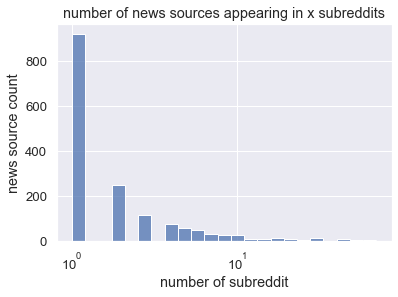

In [316]:
# sns.histplot([math.log(s,10) for s in scf])
sns.histplot(scf, log_scale=True)
plt.xlabel("number of subreddit")
plt.ylabel("news source count")
plt.title("number of news sources appearing in x subreddits")

How many news sources only appear in 10 subreddits or less? what about 9 or 8?

In [317]:
def pct_ns_in_k_subreddits(ks):
    ns_in_i_subreddit = [k for k in subreddit_count if subreddit_count[k] <= ks]
    count = len(ns_in_i_subreddit)
    print("There are {} news sources appearing in only {} subreddits or less ({}%)".format(count, ks, count/len(ns_union)))
    return count/len(ns_union)

In [318]:
pct_ns_in_k_subreddits(5)

There are 1428 news sources appearing in only 5 subreddits or less (0.8628398791540786%)


0.8628398791540786

In [319]:
0.15*len(ns_union)

248.25

In [320]:
pct_in_k_subreddits = [(i, pct_ns_in_k_subreddits(i)) for i in range(1000)]

There are 0 news sources appearing in only 0 subreddits or less (0.0%)
There are 920 news sources appearing in only 1 subreddits or less (0.5558912386706949%)
There are 1171 news sources appearing in only 2 subreddits or less (0.7075528700906344%)
There are 1288 news sources appearing in only 3 subreddits or less (0.7782477341389729%)
There are 1367 news sources appearing in only 4 subreddits or less (0.8259818731117825%)
There are 1428 news sources appearing in only 5 subreddits or less (0.8628398791540786%)
There are 1478 news sources appearing in only 6 subreddits or less (0.8930513595166163%)
There are 1511 news sources appearing in only 7 subreddits or less (0.9129909365558913%)
There are 1527 news sources appearing in only 8 subreddits or less (0.9226586102719033%)
There are 1540 news sources appearing in only 9 subreddits or less (0.9305135951661632%)
There are 1554 news sources appearing in only 10 subreddits or less (0.9389728096676737%)
There are 1568 news sources appearing i

There are 1655 news sources appearing in only 410 subreddits or less (1.0%)
There are 1655 news sources appearing in only 411 subreddits or less (1.0%)
There are 1655 news sources appearing in only 412 subreddits or less (1.0%)
There are 1655 news sources appearing in only 413 subreddits or less (1.0%)
There are 1655 news sources appearing in only 414 subreddits or less (1.0%)
There are 1655 news sources appearing in only 415 subreddits or less (1.0%)
There are 1655 news sources appearing in only 416 subreddits or less (1.0%)
There are 1655 news sources appearing in only 417 subreddits or less (1.0%)
There are 1655 news sources appearing in only 418 subreddits or less (1.0%)
There are 1655 news sources appearing in only 419 subreddits or less (1.0%)
There are 1655 news sources appearing in only 420 subreddits or less (1.0%)
There are 1655 news sources appearing in only 421 subreddits or less (1.0%)
There are 1655 news sources appearing in only 422 subreddits or less (1.0%)
There are 16

There are 1655 news sources appearing in only 522 subreddits or less (1.0%)
There are 1655 news sources appearing in only 523 subreddits or less (1.0%)
There are 1655 news sources appearing in only 524 subreddits or less (1.0%)
There are 1655 news sources appearing in only 525 subreddits or less (1.0%)
There are 1655 news sources appearing in only 526 subreddits or less (1.0%)
There are 1655 news sources appearing in only 527 subreddits or less (1.0%)
There are 1655 news sources appearing in only 528 subreddits or less (1.0%)
There are 1655 news sources appearing in only 529 subreddits or less (1.0%)
There are 1655 news sources appearing in only 530 subreddits or less (1.0%)
There are 1655 news sources appearing in only 531 subreddits or less (1.0%)
There are 1655 news sources appearing in only 532 subreddits or less (1.0%)
There are 1655 news sources appearing in only 533 subreddits or less (1.0%)
There are 1655 news sources appearing in only 534 subreddits or less (1.0%)
There are 16

Text(0.5, 1.0, 'proportion of news sources appearing in x subreddits or less')

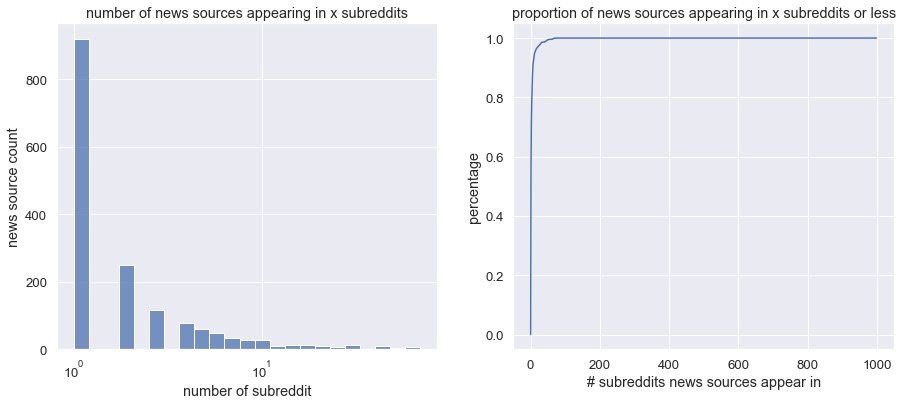

In [321]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
sns.set(font_scale = 1.2)

sns.histplot(scf, log_scale=True, ax=ax1)
ax1.set_xlabel("number of subreddit")
ax1.set_ylabel("news source count")
ax1.set_title("number of news sources appearing in x subreddits")

sns.lineplot(x=[k[0] for k in pct_in_k_subreddits],
             y=[k[1] for k in pct_in_k_subreddits],
            ax=ax2)
ax2.set_ylabel("percentage")
ax2.set_xlabel("# subreddits news sources appear in")
ax2.set_title("proportion of news sources appearing in x subreddits or less")

In [322]:
# mean
statistics.mean(scf)

3.5969788519637462

In [323]:
# median
statistics.median(scf)

1

## For each news source let's count how many times they are shared regardless of in which subreddits

In [324]:
sum(dict().values())

0

In [325]:
def get_mention_count(ns):
    """get total mention count of ns in all six months"""
    count = 0
    files = [ns_subreddit_01, ns_subreddit_02, ns_subreddit_03, ns_subreddit_04, ns_subreddit_05, ns_subreddit_06]
    for f in files:
        ns_dict = f.get(ns, dict())
        if len(ns_dict) > 0:
            mentions = sum([m[0] for m in ns_dict.values()])
            count += mentions
    return count

In [326]:
mention_count = dict()
for ns in ns_union:
    mention_count[ns] = get_mention_count(ns)

In [327]:
statistics.mean(mention_count.values())

25.962537764350454

In [328]:
statistics.stdev(mention_count.values())

191.57119033337057

In [329]:
statistics.median(mention_count.values())

2

In [330]:
len(mention_count)

1655

In [331]:
Counter(mention_count).most_common(20)

[('nba.com', 5540),
 ('espn.com', 3913),
 ('nbcsports.com', 2012),
 ('usatoday.com', 1420),
 ('theathletic.com', 1238),
 ('si.com', 1196),
 ('bleacherreport.com', 1062),
 ('nfl.com', 927),
 ('soompi.com', 816),
 ('cbssports.com', 790),
 ('theguardian.com', 528),
 ('pff.com', 503),
 ('manutd.com', 464),
 ('koreaboo.com', 457),
 ('telegraph.co.uk', 404),
 ('skysports.com', 398),
 ('bbc.co.uk', 387),
 ('denverbroncos.com', 356),
 ('theringer.com', 352),
 ('arsenal.com', 336)]

In [332]:
news_ge10k = [m for m in mention_count if mention_count[m] >= 1000]
len(news_ge10k)

7

<AxesSubplot:ylabel='Count'>

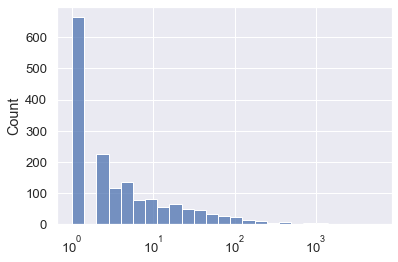

In [333]:
sns.histplot(list(mention_count.values()), log_scale=True)

<AxesSubplot:ylabel='Count'>

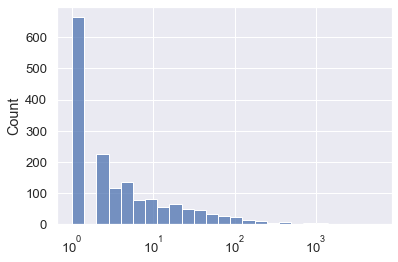

In [334]:
sns.histplot(list([k for k in mention_count.values() if k <100000]), log_scale=True)

In [335]:
len([k for k in mention_count.values() if k <5])*100/len(mention_count)

65.80060422960725

In [336]:
(1-0.35)*len(mention_count)

1075.75

## For each subreddit let's count how many news sources were mentioned in it

Counting how many news sources were mentioned in each subreddit

In [337]:
nsc_count = dict()
for sr in sr_union:
    nsc_count[sr] = len(set(subreddit_ns_jan.get(sr, dict()).keys()) 
                               | set(subreddit_ns_feb.get(sr, dict()).keys()) 
                               | set(subreddit_ns_march.get(sr, dict()).keys()) 
                               | set(subreddit_ns_april.get(sr, dict()).keys())
                               | set(subreddit_ns_may.get(sr, dict()).keys()) 
                               | set(subreddit_ns_jun.get(sr, dict()).keys()))

`nsc_count` stores how many news sources appear in each subreddit.

In [338]:
len([k for k in nsc_count if nsc_count[k]<1])

0

In [339]:
nsc_count_freq = dict(Counter(nsc_count.values()).most_common())
nsc_count_freq

{53: 4,
 40: 3,
 56: 3,
 43: 3,
 80: 3,
 77: 3,
 36: 3,
 22: 3,
 66: 3,
 15: 3,
 31: 2,
 47: 2,
 96: 2,
 38: 2,
 81: 2,
 49: 2,
 39: 2,
 88: 2,
 42: 2,
 63: 2,
 14: 2,
 98: 2,
 52: 2,
 54: 2,
 60: 2,
 7: 1,
 226: 1,
 104: 1,
 95: 1,
 83: 1,
 97: 1,
 9: 1,
 51: 1,
 136: 1,
 61: 1,
 24: 1,
 33: 1,
 50: 1,
 145: 1,
 71: 1,
 153: 1,
 68: 1,
 82: 1,
 16: 1,
 62: 1,
 35: 1,
 46: 1,
 48: 1,
 108: 1,
 94: 1,
 188: 1,
 28: 1,
 65: 1,
 67: 1,
 141: 1,
 76: 1,
 126: 1,
 17: 1,
 20: 1,
 25: 1,
 75: 1}

`nsc_count_freq` keeps track of how many news sources appear in *n* subreddits for all possible *n*.

In [340]:
max(nsc_count_freq.keys())

226

In [341]:
nsc_ranked = Counter(nsc_count).most_common()

for t in nsc_ranked:
    sr, co = t
    if co >= 80:
        print(f"{sr} has {co} news sources mentioned in it.")

Gunners has 226 news sources mentioned in it.
reddevils has 188 news sources mentioned in it.
coys has 153 news sources mentioned in it.
kpop has 145 news sources mentioned in it.
LiverpoolFC has 141 news sources mentioned in it.
chelseafc has 136 news sources mentioned in it.
TaylorSwift has 126 news sources mentioned in it.
lakers has 108 news sources mentioned in it.
buccaneers has 104 news sources mentioned in it.
bostonceltics has 98 news sources mentioned in it.
CHIBears has 98 news sources mentioned in it.
Patriots has 97 news sources mentioned in it.
detroitlions has 96 news sources mentioned in it.
GreenBayPackers has 96 news sources mentioned in it.
torontoraptors has 95 news sources mentioned in it.
buffalobills has 94 news sources mentioned in it.
MCFC has 88 news sources mentioned in it.
DenverBroncos has 88 news sources mentioned in it.
nyjets has 83 news sources mentioned in it.
Seahawks has 82 news sources mentioned in it.
Browns has 81 news sources mentioned in it.
eag

In [342]:
sum(nsc_count_freq.values()) == len(sr_union)

True

In [343]:
import itertools

In [344]:
nsc = list(itertools.chain.from_iterable(itertools.repeat(k,v) for k,v in nsc_count_freq.items()))

Text(0.5, 1.0, 'number of subreddits with x news sources')

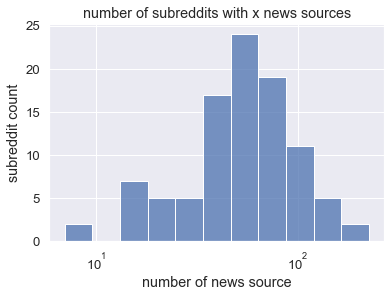

In [345]:
sns.histplot(nsc, log_scale=True)
plt.xlabel("number of news source")
plt.ylabel("subreddit count")
plt.title("number of subreddits with x news sources")

In [346]:
len([n for n in nsc if n>=20])

88

How many subreddits only mentioned 5 news sources or less?

In [347]:
def pct_subreddits_mentioning_k_newssources(ks):
    sr_mention_i_nsc = [k for k in nsc_count if nsc_count[k] <= ks]
    count = len(sr_mention_i_nsc)
    print("There are {} subreddits mentioning in only {} news sources or less ({}%)".format(count, ks, count/len(sr_union)))
    return count/len(sr_union)

In [348]:
pct_subreddits_mentioning_k_newssources(20)

There are 10 subreddits mentioning in only 20 news sources or less (0.10309278350515463%)


0.10309278350515463

In [349]:
# mean
statistics.mean(nsc)

61.371134020618555

In [350]:
# median
statistics.median(nsc)

53

## For each subreddit let's count total submissions that are news source related

In [351]:
def get_submission_count(sb):
    """get total mention count of ns in all six months"""
    count = 0
    files = [subreddit_ns_jan, subreddit_ns_feb, subreddit_ns_march, subreddit_ns_april, subreddit_ns_may, subreddit_ns_jun]
    for f in files:
        sb_dict = f.get(sb, dict())
        if len(sb_dict) > 0:
            mentions = sum([m[0] for m in sb_dict.values()])
            count += mentions
    return count

In [352]:
mention_count = dict()
for sb in sr_union:
    mention_count[sb] = get_submission_count(sb)

In [353]:
statistics.mean(mention_count.values())

442.96907216494844

In [354]:
statistics.stdev(mention_count.values())

429.12669199608774

In [355]:
statistics.median(mention_count.values())

350

In [356]:
len(mention_count)

97

In [357]:
Counter(mention_count).most_common(20)

[('kpop', 2010),
 ('reddevils', 1991),
 ('Gunners', 1974),
 ('MkeBucks', 1331),
 ('NYKnicks', 1290),
 ('warriors', 1279),
 ('DenverBroncos', 1271),
 ('chelseafc', 1127),
 ('torontoraptors', 1075),
 ('denvernuggets', 1033),
 ('coys', 1007),
 ('Patriots', 840),
 ('49ers', 827),
 ('LiverpoolFC', 811),
 ('detroitlions', 766),
 ('CHIBears', 724),
 ('eagles', 704),
 ('GreenBayPackers', 698),
 ('Seahawks', 692),
 ('bostonceltics', 681)]

In [358]:
ns_subreddit_01['cbc.ca']

{'steelers': [1, 1.0, 1]}

<AxesSubplot:ylabel='Count'>

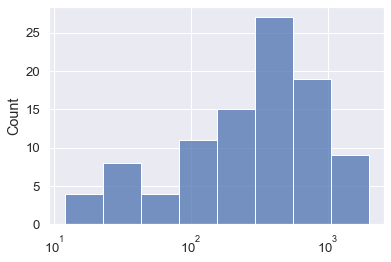

In [359]:
sns.histplot(list(mention_count.values()), log_scale=True)

In [360]:
len([k for k in mention_count.values() if k <5])*100/len(mention_count)

0.0

In [361]:
(1-0.35)*len(mention_count)

63.050000000000004

## upvote based weight vs comment based weight 

Do they have correlation?

Let's look at January's data

In [364]:
upvote_based = [ns_subreddit_02[ns][sr][1] for ns in ns_subreddit_02 for sr in ns_subreddit_02[ns]]
comment_based = [ns_subreddit_02[ns][sr][2] for ns in ns_subreddit_02 for sr in ns_subreddit_02[ns]]
unweighted = [ns_subreddit_02[ns][sr][0] for ns in ns_subreddit_02 for sr in ns_subreddit_02[ns]]

Text(0, 0.5, 'upvote_based')

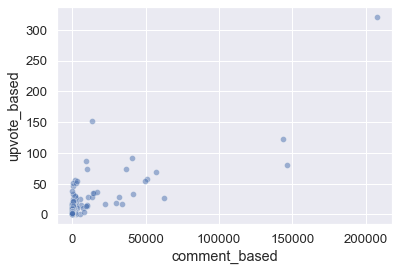

In [365]:
sns.scatterplot(x=comment_based, y=upvote_based, alpha=0.5)
plt.xlabel("comment_based")
plt.ylabel("upvote_based")
# plt.xlim([-100000,4000000])
# plt.ylim([-5000,150000])

Text(0, 0.5, 'upvote_based')

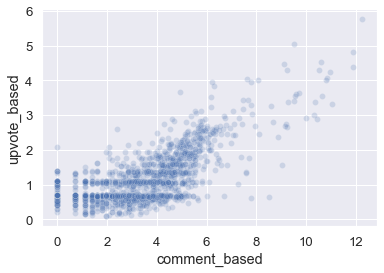

In [366]:
a = sns.scatterplot(x=np.log(np.array([c+1 for c in comment_based])), y=np.log(np.array([u+1 for u in upvote_based])), alpha=0.2)
plt.xlabel("comment_based")
plt.ylabel("upvote_based")

In [367]:
from scipy.stats import pearsonr

In [368]:
corr, _ = pearsonr(np.log(np.array([c+1 for c in comment_based])), np.log(np.array([u+1 for u in upvote_based])))
corr

0.7030648849378344

In [369]:
corr_raw, _ = pearsonr(comment_based, upvote_based)
corr_raw

0.7946228855517274

In [370]:
non_outlier = [n for n in ns_union if subreddit_count[n]>10]
len(non_outlier)

101

## Cluster Try Out

First, I make a list of subreddits with fixed order, where I only include subreddits where our non_outlier news sources are mentioned in.

In [371]:
len(non_outlier)

101

In [373]:
# subreddits = subs
subreddits = set()
nsr_files = [ns_subreddit_01, ns_subreddit_02, ns_subreddit_03, ns_subreddit_04, ns_subreddit_05, ns_subreddit_06]
# first, I filter for only the subreddits in which our news sources are mentioned
c = 0
for n in non_outlier:
    subreddits = (subreddits | (set(ns_subreddit_01.get(n, dict()).keys()) 
                               | set(ns_subreddit_02.get(n, dict()).keys()) 
                               | set(ns_subreddit_03.get(n, dict()).keys()) 
                               | set(ns_subreddit_04.get(n, dict()).keys())
                               | set(ns_subreddit_05.get(n, dict()).keys()) 
                               | set(ns_subreddit_06.get(n, dict()).keys())))
    c += 1
    if c%100==0: print(f"done {c}")
subreddits = list(subreddits)
len(subreddits)

done 100


97

There are 9195 subreddits.

In [374]:
subreddits[-10:]

['GoNets',
 'U2Band',
 'Madonna',
 'Jaguars',
 'UKbands',
 'CharlotteHornets',
 'suns',
 'DetroitPistons',
 'GunsNRoses',
 'ravens']

If I should order them later, I can do so.

## Incorporating subscribers information

In [375]:
pd1 = os.path.split(os.getcwd())[0]
data_fp = os.path.join(pd1,"data/gm-newssources-subreddits")
dfp = os.path.join(pd1,"data")

In [376]:
sfp = os.path.join(pd1,"data/subreddits")

In [377]:
# Let's only use the subreddits that have lots of subscribers
with open (os.path.join(sfp,"subreddit_subscribers.json"), "r", encoding = "utf-8") as infile:
    subreddit_subscribers = json.load(infile)

In [378]:
subreddit_subscribers['politics']

6201779

In [379]:
len(subreddit_subscribers)

49055

In [380]:
len(subreddits)

97

In [381]:
subreddits_w_subc = [k for k in subreddits if k in subreddit_subscribers]
len(subreddits_w_subc)

97

It seems that there are `None` values, so let's filter those subreddits out.

In [382]:
print([s for s in subreddits_w_subc if subreddit_subscribers[s] is None])

[]


In [383]:
subreddits_w_subc = [s for s in subreddits_w_subc if subreddit_subscribers[s] is not None]

In [384]:
len(subreddits_w_subc)

97

Now, I will sort the 8,294 subreddits based on the # of their subscribers in a descending order.

In [385]:
srs_all = sorted(subreddits_w_subc, key= lambda x: subreddit_subscribers[x], reverse= True)

Text(0.5, 1.0, 'Subreddits Subscribers')

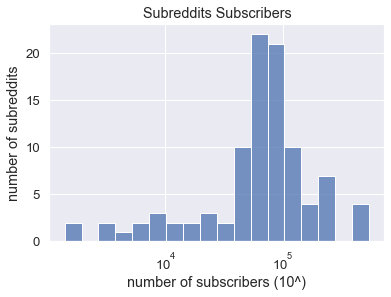

In [386]:
# plt.hist([math.log(subreddit_subscribers[s],10) for s in srs_all if subreddit_subscribers[s] > 0])
sns.histplot([subreddit_subscribers[s] for s in srs_all if subreddit_subscribers[s]>0], log_scale=True)
# plt.hist([subreddit_subscribers[s] for s in srs_all if subreddit_subscribers[s] > 0])
# plt.yscale("log")
# plt.xscale("log")
plt.ylabel("number of subreddits")
plt.xlabel("number of subscribers (10^)")
plt.title("Subreddits Subscribers")
# log scale for both x and y

Which subreddits are the top three?

In [387]:
print([(s,subreddit_subscribers[s]) for s in srs_all if subreddit_subscribers[s]>10000])

[('Patriots', 535250), ('kpop', 504918), ('Kanye', 388152), ('LosAngelesRams', 387495), ('warriors', 265568), ('LiverpoolFC', 250977), ('reddevils', 240096), ('lakers', 239106), ('torontoraptors', 229126), ('bostonceltics', 207371), ('eagles', 199979), ('chelseafc', 176842), ('Gunners', 162044), ('GreenBayPackers', 157249), ('sixers', 149868), ('cowboys', 133201), ('rockets', 128870), ('chicagobulls', 126536), ('Eminem', 125736), ('steelers', 115849), ('49ers', 110980), ('NYKnicks', 110101), ('minnesotavikings', 107310), ('Seahawks', 104920), ('MkeBucks', 102969), ('GoNets', 102496), ('Mavericks', 101968), ('CHIBears', 99668), ('Thunder', 96946), ('AtlantaHawks', 96345), ('falcons', 95529), ('TaylorSwift', 95284), ('KansasCityChiefs', 93204), ('ravens', 90432), ('NBASpurs', 90311), ('timberwolves', 85685), ('Browns', 84275), ('denvernuggets', 82369), ('washingtonwizards', 80246), ('suns', 79819), ('UtahJazz', 79381), ('DenverBroncos', 78960), ('LAClippers', 78619), ('kings', 78406), ('

In [388]:
list(subreddit_subscribers.values()).count(None)

25

In [389]:
statistics.median([k for k in list(subreddit_subscribers.values()) if k is not None])

1420.0

In [390]:
statistics.mean([k for k in list(subreddit_subscribers.values()) if k is not None])

50070.832184376915

## Building `ns_repr`

Which will be in the form of feature-based matrix, where each row represents a news source, and columns representing subreddits. 

Idea 1: Each subreddit will be represented by 18 columns: unweighted count, upvote based weighted count, and comment based weighted count for each of the six months that we are interested in. THIS does not work.

Idea 2: Each subreddit will be represented by 3 columns: average unweighted count, average upvote based weighted count, and average comment based weighted count.

In [391]:
srs = srs_all

In [392]:
a = {"a": 1, "b": 2}
b = {"b": 1, "c": 2}
res = {**a, **b}
res

{'a': 1, 'b': 1, 'c': 2}

Idea 1: For each news source, I create a list of length `(18 * # subreddits)`.

Idea 1: For each news source, I create a list of length `(3 * # subreddits)`

Old code
```
# here I will cast the inner dictionaries of ns_subreddits to be Counter so I can avoid a lot of if-else statements
files = [ns_subreddit_01, ns_subreddit_02, ns_subreddit_03, ns_subreddit_04, ns_subreddit_05, ns_subreddit_06]
for f in files:
    for k in f: # k is each news source
        for ns in f[k]:
            # averaging based on weighted counts
            count, upv, comm = f[k][ns]
            avg = (upv + comm)/count
            f[k][ns] = avg
        f[k] = Counter(f[k])
```

In [393]:
files_sub = [subreddit_ns_jan, subreddit_ns_feb, subreddit_ns_march, subreddit_ns_april, subreddit_ns_may, subreddit_ns_jun]
files_ns = [ns_subreddit_01, ns_subreddit_02, ns_subreddit_03, ns_subreddit_04, ns_subreddit_05, ns_subreddit_06]

In [394]:
len(non_outlier)

101

In [395]:
len(srs)

97

I tried and found out that using all 23.7k subreddits results in MemoryError. So I should use less

In [396]:
srs = srs_all

For idea 1:

```
ns_sr_rep = defaultdict(list)
default_counter = Counter() # to avoid a lot of if else statements

ncount = 0

# for ns in nss:
for ns in non_outlier:
    # for each news sources, construct the 18*length(subreddits) features
    for f in files_sub:
        for idx in range(len(srs)):
            # making sure the ordering follows `srs` based on subscribers
            ns_sr_rep[ns] += f[ns][srs[idx]][1:] if (ns in f and srs[idx] in f[ns]) else [0, 0]
    ncount += 1
    if ncount%200==0: print(ncount)
```

In [397]:
# For idea 2

ns_sr_rep = defaultdict(list)
default_counter = Counter() # to avoid a lot of if else statements

ncount = 0

# for ns in nss:
for ns in non_outlier:
    # for each news sources, construct the length(subreddits) features
    for idx in range(len(srs)):
        # making sure the ordering follows `srs` based on subscribers
        current_sr = srs[idx]
        # avg_unweighted_counts = sum([ii[current_sr][ns][0] if current_sr in ii and ns in ii[current_sr] else 0 for ii in files_sub])/6
        avg_votebased_counts = sum([ii[current_sr][ns][1] if (current_sr in ii and ns in ii[current_sr]) else 0 for ii in files_sub])/6
        avg_commentbased_counts = sum([ii[current_sr][ns][2] if current_sr in ii and ns in ii[current_sr] else 0 for ii in files_sub])/6
        ns_sr_rep[ns] += [avg_votebased_counts, avg_commentbased_counts]
    ncount += 1
    if ncount%200==0: print(ncount)

In [398]:
len(srs)

97

In [399]:
len(non_outlier)

101

    code started at 22:56

Let's see one example of representation for `nytimes.com`.

In [400]:
ns_sr_rep["bbc.co.uk"]

[0.0,
 0.0,
 0.0,
 0.0,
 0.08333333333333333,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 6.2200000000000015,
 128.0,
 14.876666666666667,
 668.3333333333334,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 5.345,
 549.1666666666666,
 7.181666666666668,
 324.1666666666667,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.16,
 3.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.3333333333333333,
 2.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5,
 0.6666666666666666,
 4.161666666666667,
 153.0,
 0.0,
 0.0,
 0.0,
 0.0,
 3.0850000000000004,
 46.666666666666664,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 

Let's investigate the sparsity of our data

In [401]:
from numpy import array
from numpy import count_nonzero
from scipy.sparse import csr_matrix

In [402]:
# ns_repr, ns_fixed = np.array([v[1] for v in items]), list([v[0] for v in items]) # this causes memory error
## MemoryError: Unable to allocate 15.3 GiB for an array with shape (11436, 180000) and data type float64
items = ns_sr_rep.items()
ns_repr = np.array([k for k in ns_sr_rep.values()])

In [403]:
ns_repr[:10]

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.315     , 10.5       ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.13      ,  0.33333333,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.46      , 26.5       ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.16666667,  1.33333333]])

In [404]:
sparsity = 1.0 - np.count_nonzero(ns_repr)/ns_repr.size

In [405]:
sparsity

0.7451260589976523

Wow very high sparsity.

In [406]:
len(non_outlier)

101

How many subreddits have all 0's for all news sources?

In [407]:
counter = 0
for ii in range(len(srs)):
    fl = []
    for kk in ns_repr:
        fl.append(kk[ii])
    counter += 1
    print(statistics.median(fl), statistics.mean(fl), statistics.variance(fl), counter)

0.0 0.823927392739274 5.130794088008801 1
0.0 31.7013201320132 8284.841842684269 2
0.0 0.1900990099009901 0.43879649009900984 3
0.0 6.580858085808581 643.3414521452145 4
0.0 0.1129042904290429 0.3249074251925192 5
0.0 0.22277227722772278 1.3284873487348736 6
0.0 0.27127062706270627 0.9695013415841583 7
0.0 5.0561056105610565 328.0162651265127 8
0.0 1.7474587458745874 83.1721562552255 9
0.0 1408.4719471947194 131502045.6289274 10
0.0 0.7084983498349835 3.902527305830583 11
0.0 61.23927392739274 41673.69911991199 12
0.0 1.6143729372937294 22.232915269526952 13
0.0 230.32673267326734 2552366.707178218 14
0.11333333333333334 0.7149834983498349 5.628307249724971 15
0.0 34.75247524752475 55894.02256325633 16
0.0 1.2147359735973597 27.03741165181518 17
0.0 774.6518151815181 23145896.38061056 18
0.0 0.6973102310231023 6.9663403872387235 19
0.0 72.14356435643565 270497.65446094616 20
0.0 0.6632013201320132 3.547512760176018 21
0.0 38.45214521452145 12878.596853685369 22
0.0 0.7452145214521452 4

In [408]:
# convert to sparse matrix (CSR method)
S = csr_matrix(ns_repr)
print(S)

  (0, 8)	0.03333333333333333
  (0, 9)	1.8333333333333333
  (0, 16)	0.14166666666666666
  (0, 17)	8.166666666666666
  (0, 18)	0.8333333333333334
  (0, 19)	0.3333333333333333
  (0, 34)	0.03333333333333333
  (0, 35)	1.8333333333333333
  (0, 42)	0.15
  (0, 43)	13.666666666666666
  (0, 56)	0.17333333333333334
  (0, 57)	3.8333333333333335
  (0, 58)	0.5
  (0, 59)	0.8333333333333334
  (0, 92)	0.19666666666666666
  (0, 93)	7.0
  (0, 98)	0.049999999999999996
  (0, 99)	2.0
  (0, 140)	0.024999999999999998
  (0, 141)	4.0
  (0, 148)	0.08333333333333333
  (0, 149)	0.16666666666666666
  (1, 0)	0.315
  (1, 1)	10.5
  (1, 38)	0.16
  :	:
  (100, 8)	0.26666666666666666
  (100, 9)	3.6666666666666665
  (100, 18)	0.6516666666666667
  (100, 19)	33.666666666666664
  (100, 20)	0.16666666666666666
  (100, 21)	0.3333333333333333
  (100, 26)	0.07333333333333333
  (100, 27)	6.833333333333333
  (100, 40)	0.16666666666666666
  (100, 44)	0.13833333333333334
  (100, 45)	2.8333333333333335
  (100, 50)	0.21333333333333335

### Now PCA

In [409]:
print([k for k in ns_repr[21:50]])

[array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       5.53166667e+00, 1.08333333e+01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.66666667e-01, 6.66666667e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       5.13166667e+00, 1.36833333e+02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
     

In [410]:
svd = TruncatedSVD(n_components=100) #, n_iter=7, random_state=42)
svd_pca = PCA(n_components=min(len(ns_repr), len(ns_repr[0])))

In [411]:
# fit1 = svd.fit(ns_repr)
# fit1 = svd.fit(csr_matrix(preprocessing.normalize(ns_repr)))
fit1 = svd_pca.fit(StandardScaler().fit_transform(np.array(ns_repr)))

In [412]:
explained_var = fit1.explained_variance_ratio_

In [413]:
explained_var

array([2.89782463e-01, 1.88111086e-01, 8.53533490e-02, 6.04118873e-02,
       5.85288278e-02, 3.08462049e-02, 2.59999215e-02, 2.26510988e-02,
       2.15287008e-02, 1.90085190e-02, 1.81302152e-02, 1.63390803e-02,
       1.39001599e-02, 1.25825810e-02, 1.12081665e-02, 9.52193828e-03,
       8.81427976e-03, 8.36698514e-03, 7.82230402e-03, 7.21862578e-03,
       6.05745966e-03, 5.92409083e-03, 5.29964757e-03, 4.73618572e-03,
       4.65716263e-03, 4.48005022e-03, 4.33767162e-03, 3.76602680e-03,
       3.46518806e-03, 3.23151898e-03, 3.00597720e-03, 2.80977322e-03,
       2.60582112e-03, 2.34749019e-03, 2.12353665e-03, 1.94551734e-03,
       1.73011239e-03, 1.66896997e-03, 1.61354062e-03, 1.50092228e-03,
       1.45506799e-03, 1.26016010e-03, 1.10984489e-03, 1.06474037e-03,
       1.03627991e-03, 9.50140378e-04, 8.88336155e-04, 8.12717783e-04,
       7.29607868e-04, 6.88881857e-04, 6.47188606e-04, 6.13780525e-04,
       5.18570916e-04, 4.53564829e-04, 4.31929696e-04, 3.92302583e-04,
      

In [414]:
len(explained_var)

101

In [415]:
fit1.explained_variance_ratio_.sum()

1.0000000000000004

In [416]:
explained_var_sums = [sum(explained_var[:d]) for d in range(len(ns_repr))]

In [417]:
explained_var_sums

[0,
 0.2897824634705373,
 0.4778935494850596,
 0.5632468984799595,
 0.6236587857674591,
 0.6821876135624334,
 0.7130338184355832,
 0.7390337399427744,
 0.761684838720935,
 0.7832135394783246,
 0.8022220585097933,
 0.8203522736724148,
 0.8366913539620943,
 0.8505915138979275,
 0.863174094866968,
 0.8743822613785925,
 0.8839041996583601,
 0.8927184794217773,
 0.9010854645573496,
 0.9089077685795418,
 0.9161263943620717,
 0.9221838540267213,
 0.9281079448595547,
 0.9334075924288706,
 0.9381437781457579,
 0.9428009407755986,
 0.947280990992088,
 0.9516186626125974,
 0.9553846894095829,
 0.9588498774701878,
 0.9620813964477893,
 0.9650873736487411,
 0.9678971468699716,
 0.9705029679858544,
 0.9728504581746812,
 0.9749739948290114,
 0.9769195121725776,
 0.97864962456524,
 0.9803185945376247,
 0.9819321351607921,
 0.9834330574412496,
 0.9848881254292873,
 0.9861482855311253,
 0.987258130419531,
 0.9883228707937874,
 0.989359150703076,
 0.9903092910814666,
 0.9911976272363834,
 0.9920103450193

<AxesSubplot:>

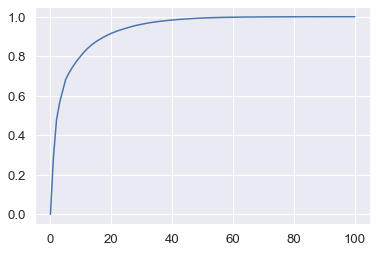

In [418]:
sns.lineplot(x=range(len(explained_var_sums)), y=explained_var_sums)

Now, I will cast those list representation values to be numpy arrays so I can preprocess them easily. Further, I will normalize each array.

*side note: `preprocessing.normalize` vs `standardscaler`*

In [419]:
preprocessing.normalize(np.array([[1,100,2,3],[2,50,100,10]]))

array([[0.00999301, 0.99930073, 0.01998601, 0.02997902],
       [0.01781459, 0.44536472, 0.89072943, 0.08907294]])

In [420]:
scaler = StandardScaler()
scaler.fit_transform(np.array([[1,100,2,3],[2,50,100,10],[2,50,100,10]]))

array([[-1.41421356,  1.41421356, -1.41421356, -1.41421356],
       [ 0.70710678, -0.70710678,  0.70710678,  0.70710678],
       [ 0.70710678, -0.70710678,  0.70710678,  0.70710678]])

Now I'm thinking, should I *normalize* or *standardize*?

In [421]:
# for ns in ns_sr_rep:
#     rep = ns_sr_rep[ns]
#     ns_sr_rep[ns] = preprocessing.normalize(np.array([rep]))

## K-Means

Without and with standardization.

First, I need to find optimum `k`.

In [422]:
ns_repr_new = fit1.transform(StandardScaler().fit_transform(np.array(ns_repr))) #fit1 is PCA

In [423]:
ns_repr_new = [k[:15] for k in ns_repr_new]

In [424]:
kmeans = KMeans(init = "k-means++",
               n_clusters = 5,
               n_init = 10,
               max_iter = 100)

Freezing the list for representations and the news sources.

In [425]:
kmeans.fit([v for v in ns_repr_new])

KMeans(max_iter=100, n_clusters=5)

In [426]:
ns_fixed = list(ns_sr_rep.keys())

In [427]:
for i,ns in enumerate(ns_fixed):
    if (ns_sr_rep[ns] == ns_repr[i]).all():
        pass
    else:
        print("False")
print("True")

True


In [428]:
kmeans.inertia_

5883.935053933942

In [429]:
kmeans.n_iter_

3

In [430]:
Counter(kmeans.labels_)

Counter({0: 86, 4: 8, 1: 5, 3: 1, 2: 1})

**Choosing the appropriate number of clusters**

1. Elbow method

In [431]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 360
}

In [432]:
sse = []
for k in range(1,20):
    kmeans = KMeans(n_clusters = k, **kmeans_kwargs)
    kmeans.fit(ns_repr_new)
    sse.append(kmeans.inertia_)
    print(f"have done {k} rounds, current sse is {sse}")

have done 1 rounds, current sse is [17044.33342105291]
have done 2 rounds, current sse is [17044.33342105291, 12449.807631496364]
have done 3 rounds, current sse is [17044.33342105291, 12449.807631496364, 9569.199140509883]
have done 4 rounds, current sse is [17044.33342105291, 12449.807631496364, 9569.199140509883, 8063.320881591436]
have done 5 rounds, current sse is [17044.33342105291, 12449.807631496364, 9569.199140509883, 8063.320881591436, 6952.431555733311]
have done 6 rounds, current sse is [17044.33342105291, 12449.807631496364, 9569.199140509883, 8063.320881591436, 6952.431555733311, 6538.13263198886]
have done 7 rounds, current sse is [17044.33342105291, 12449.807631496364, 9569.199140509883, 8063.320881591436, 6952.431555733311, 6538.13263198886, 6233.680467473019]
have done 8 rounds, current sse is [17044.33342105291, 12449.807631496364, 9569.199140509883, 8063.320881591436, 6952.431555733311, 6538.13263198886, 6233.680467473019, 4447.355204911261]
have done 9 rounds, curr

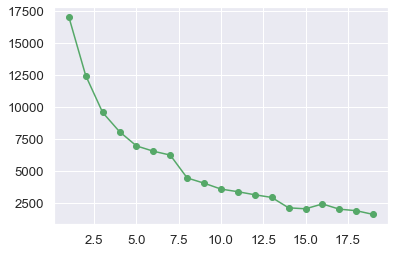

In [433]:
plt.plot(range(1,20),sse,"go-")

In [434]:
for k in range(20,41):
    kmeans = KMeans(n_clusters = k, **kmeans_kwargs)
    kmeans.fit(ns_repr_new)
    sse.append(kmeans.inertia_)
    print(f"have done {k} rounds, current sse is {sse}")

have done 20 rounds, current sse is [17044.33342105291, 12449.807631496364, 9569.199140509883, 8063.320881591436, 6952.431555733311, 6538.13263198886, 6233.680467473019, 4447.355204911261, 4039.977159086222, 3577.5825242233145, 3372.546527950039, 3133.0368977530816, 2924.954728212767, 2112.711981407152, 2037.0840852401382, 2416.371458479265, 2007.4524263859175, 1890.0274017869801, 1598.266801126025, 1195.6576346634972]
have done 21 rounds, current sse is [17044.33342105291, 12449.807631496364, 9569.199140509883, 8063.320881591436, 6952.431555733311, 6538.13263198886, 6233.680467473019, 4447.355204911261, 4039.977159086222, 3577.5825242233145, 3372.546527950039, 3133.0368977530816, 2924.954728212767, 2112.711981407152, 2037.0840852401382, 2416.371458479265, 2007.4524263859175, 1890.0274017869801, 1598.266801126025, 1195.6576346634972, 1209.7270367360468]
have done 22 rounds, current sse is [17044.33342105291, 12449.807631496364, 9569.199140509883, 8063.320881591436, 6952.431555733311, 6

have done 37 rounds, current sse is [17044.33342105291, 12449.807631496364, 9569.199140509883, 8063.320881591436, 6952.431555733311, 6538.13263198886, 6233.680467473019, 4447.355204911261, 4039.977159086222, 3577.5825242233145, 3372.546527950039, 3133.0368977530816, 2924.954728212767, 2112.711981407152, 2037.0840852401382, 2416.371458479265, 2007.4524263859175, 1890.0274017869801, 1598.266801126025, 1195.6576346634972, 1209.7270367360468, 1169.4060648729414, 1121.1439631958312, 1113.6536422970564, 1069.7964468082425, 1066.5865062735093, 1050.4271868823173, 1026.0139924740513, 978.925968470179, 979.9181902289109, 976.8902556035392, 812.7488753867693, 802.3995776843694, 741.5225099463303, 843.1903640830024, 801.4809778532151, 844.7119013304796]
have done 38 rounds, current sse is [17044.33342105291, 12449.807631496364, 9569.199140509883, 8063.320881591436, 6952.431555733311, 6538.13263198886, 6233.680467473019, 4447.355204911261, 4039.977159086222, 3577.5825242233145, 3372.546527950039, 

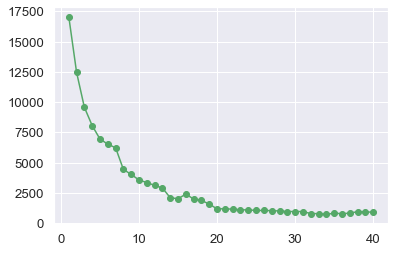

In [435]:
plt.plot(range(1,41),sse,"go-")

In [436]:
kl = KneeLocator(range(1,41), sse, curve="convex", direction="decreasing")

In [437]:
kl.elbow

10

**Using Silhouette Coefficient**

In [438]:
sc = []
new_sse = []
for k in range(2,30):
    kmeans = KMeans(n_clusters = k, **kmeans_kwargs)
    kmeans.fit(ns_repr_new)
    score = silhouette_score(ns_repr_new, kmeans.labels_)
    sc.append(score)
    new_sse.append(kmeans.inertia_)
    print("step {}".format(k))

step 2
step 3
step 4
step 5
step 6
step 7
step 8
step 9
step 10
step 11
step 12
step 13
step 14
step 15
step 16
step 17
step 18
step 19
step 20
step 21
step 22
step 23
step 24
step 25
step 26
step 27
step 28
step 29


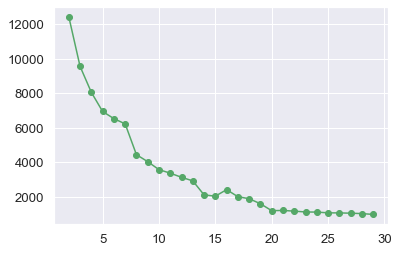

In [439]:
# for sse
plt.plot(range(2,30), new_sse, "go-")

In [440]:
kl_new = KneeLocator(range(2,30), new_sse, curve="convex", direction="decreasing")
kl_new.elbow

10

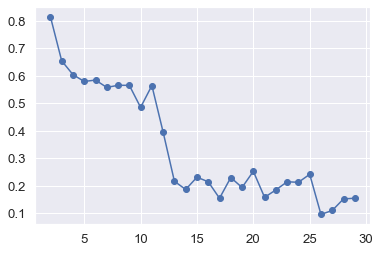

In [441]:
# for silhouette coefficient
plt.plot(range(2,30), sc, "bo-")

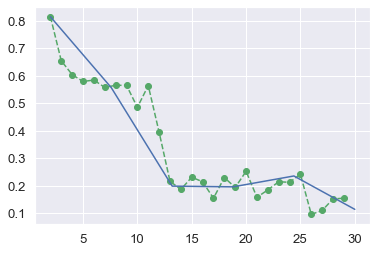

In [442]:


spl = make_interp_spline(range(2,30), sc, k=3)  # type: BSpline

xs = np.linspace(2, 30, 6)
ys = spl(xs)

plt.plot(range(2,30), sc, "go--")
plt.plot(xs, ys, "b-")

Let's choose k = 10

In [443]:
kmeans = KMeans(n_clusters = 5, init="k-means++", n_init = 50, max_iter = 500, random_state = 360)
kmeans.fit(ns_repr_new)

KMeans(max_iter=500, n_clusters=5, n_init=50, random_state=360)

In [444]:
kmeans.labels_

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 0, 3, 3, 4, 3, 3,
       3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3,
       3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3,
       3, 3, 3, 3, 3, 0, 3, 3, 1, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 0, 0, 3, 4, 3, 4, 4, 3, 3, 3])

In [445]:
set(kmeans.labels_)

{0, 1, 2, 3, 4}

In [446]:
Counter(kmeans.labels_)

Counter({3: 84, 4: 7, 0: 8, 2: 1, 1: 1})

**Let's investigate each cluster**

In [447]:
len(ns_sr_rep)

101

In [448]:
len(kmeans.labels_)

101

In [449]:
clustered = defaultdict(list)
for idx,ns in enumerate(non_outlier):
    c = kmeans.labels_[idx]
    clustered[c].append(ns)

In [450]:
print([len(clustered[i]) for i in range(5)])

[8, 1, 1, 84, 7]


Let's see in terms of percentage

In [451]:
cluster_lens = [len(clustered[i]) for i in range(10)]

In [452]:
print([round(k*100/sum(cluster_lens),2) for k in cluster_lens])

[7.92, 0.99, 0.99, 83.17, 6.93, 0.0, 0.0, 0.0, 0.0, 0.0]


 **could do iterative clusters for ^**

In [456]:
clustered[2]

['espn.com']

# Agglomerative (Hierarchical) Clustering

In [457]:
hclustering = AgglomerativeClustering(n_clusters=5)

In [458]:
hclustering.fit(ns_repr_new)

AgglomerativeClustering(n_clusters=5)

In [459]:
hclustering.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 4, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0,
       0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0,
       0, 0, 0, 0, 0, 4, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 4, 4, 0, 1, 0, 1, 1, 0, 0, 0], dtype=int64)

In [460]:
hier_clustered = defaultdict(list)
for idx,ns in enumerate(non_outlier):
    c = hclustering.labels_[idx]
    hier_clustered[c].append(ns)

In [461]:
print([len(hier_clustered[i]) for i in range(5)])

[84, 7, 1, 1, 8]


Let's see in terms of percentage

In [462]:
hcluster_lens = [len(hier_clustered[i]) for i in range(10)]

In [463]:
print([round(k*100/sum(hcluster_lens),2) for k in hcluster_lens])

[83.17, 6.93, 0.99, 0.99, 7.92, 0.0, 0.0, 0.0, 0.0, 0.0]


In [464]:
hier_clustered[0]

['inquisitr.com',
 'al.com',
 'nbaanalysis.net',
 'mirror.co.uk',
 '247sports.com',
 'theundefeated.com',
 'washingtonpost.com',
 'rotoballer.com',
 'bolavip.com',
 'thetimes.co.uk',
 'radio.com',
 'sportscasting.com',
 'fadeawayworld.net',
 'nytimes.com',
 'iheart.com',
 'wsj.com',
 'thespun.com',
 'gq.com',
 'genius.com',
 'cityam.com',
 'stitcher.com',
 'pitchfork.com',
 'nypost.com',
 'realgm.com',
 'fivethirtyeight.com',
 'buzzsprout.com',
 'hoopshype.com',
 'sportsnet.ca',
 'thebrag.com',
 'sportwitness.co.uk',
 'fansided.com',
 'sandiegouniontribune.com',
 'draftkings.com',
 'deadline.com',
 'nydailynews.com',
 'givemesport.com',
 'cbslocal.com',
 'thebiglead.com',
 'uproxx.com',
 'sportingnews.com',
 'freep.com',
 'theonion.com',
 'theplayerstribune.com',
 'complex.com',
 'rollingstone.com',
 'apnews.com',
 'yardbarker.com',
 'variety.com',
 'sportsnaut.com',
 'buzzfeed.com',
 'dailysnark.com',
 'fantasyalarm.com',
 'nj.com',
 'latimes.com',
 'hoopsrumors.com',
 'foxnews.com',


In [465]:
set(hier_clustered[0]) & set(clustered[4])

set()

## Using scipy

https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage

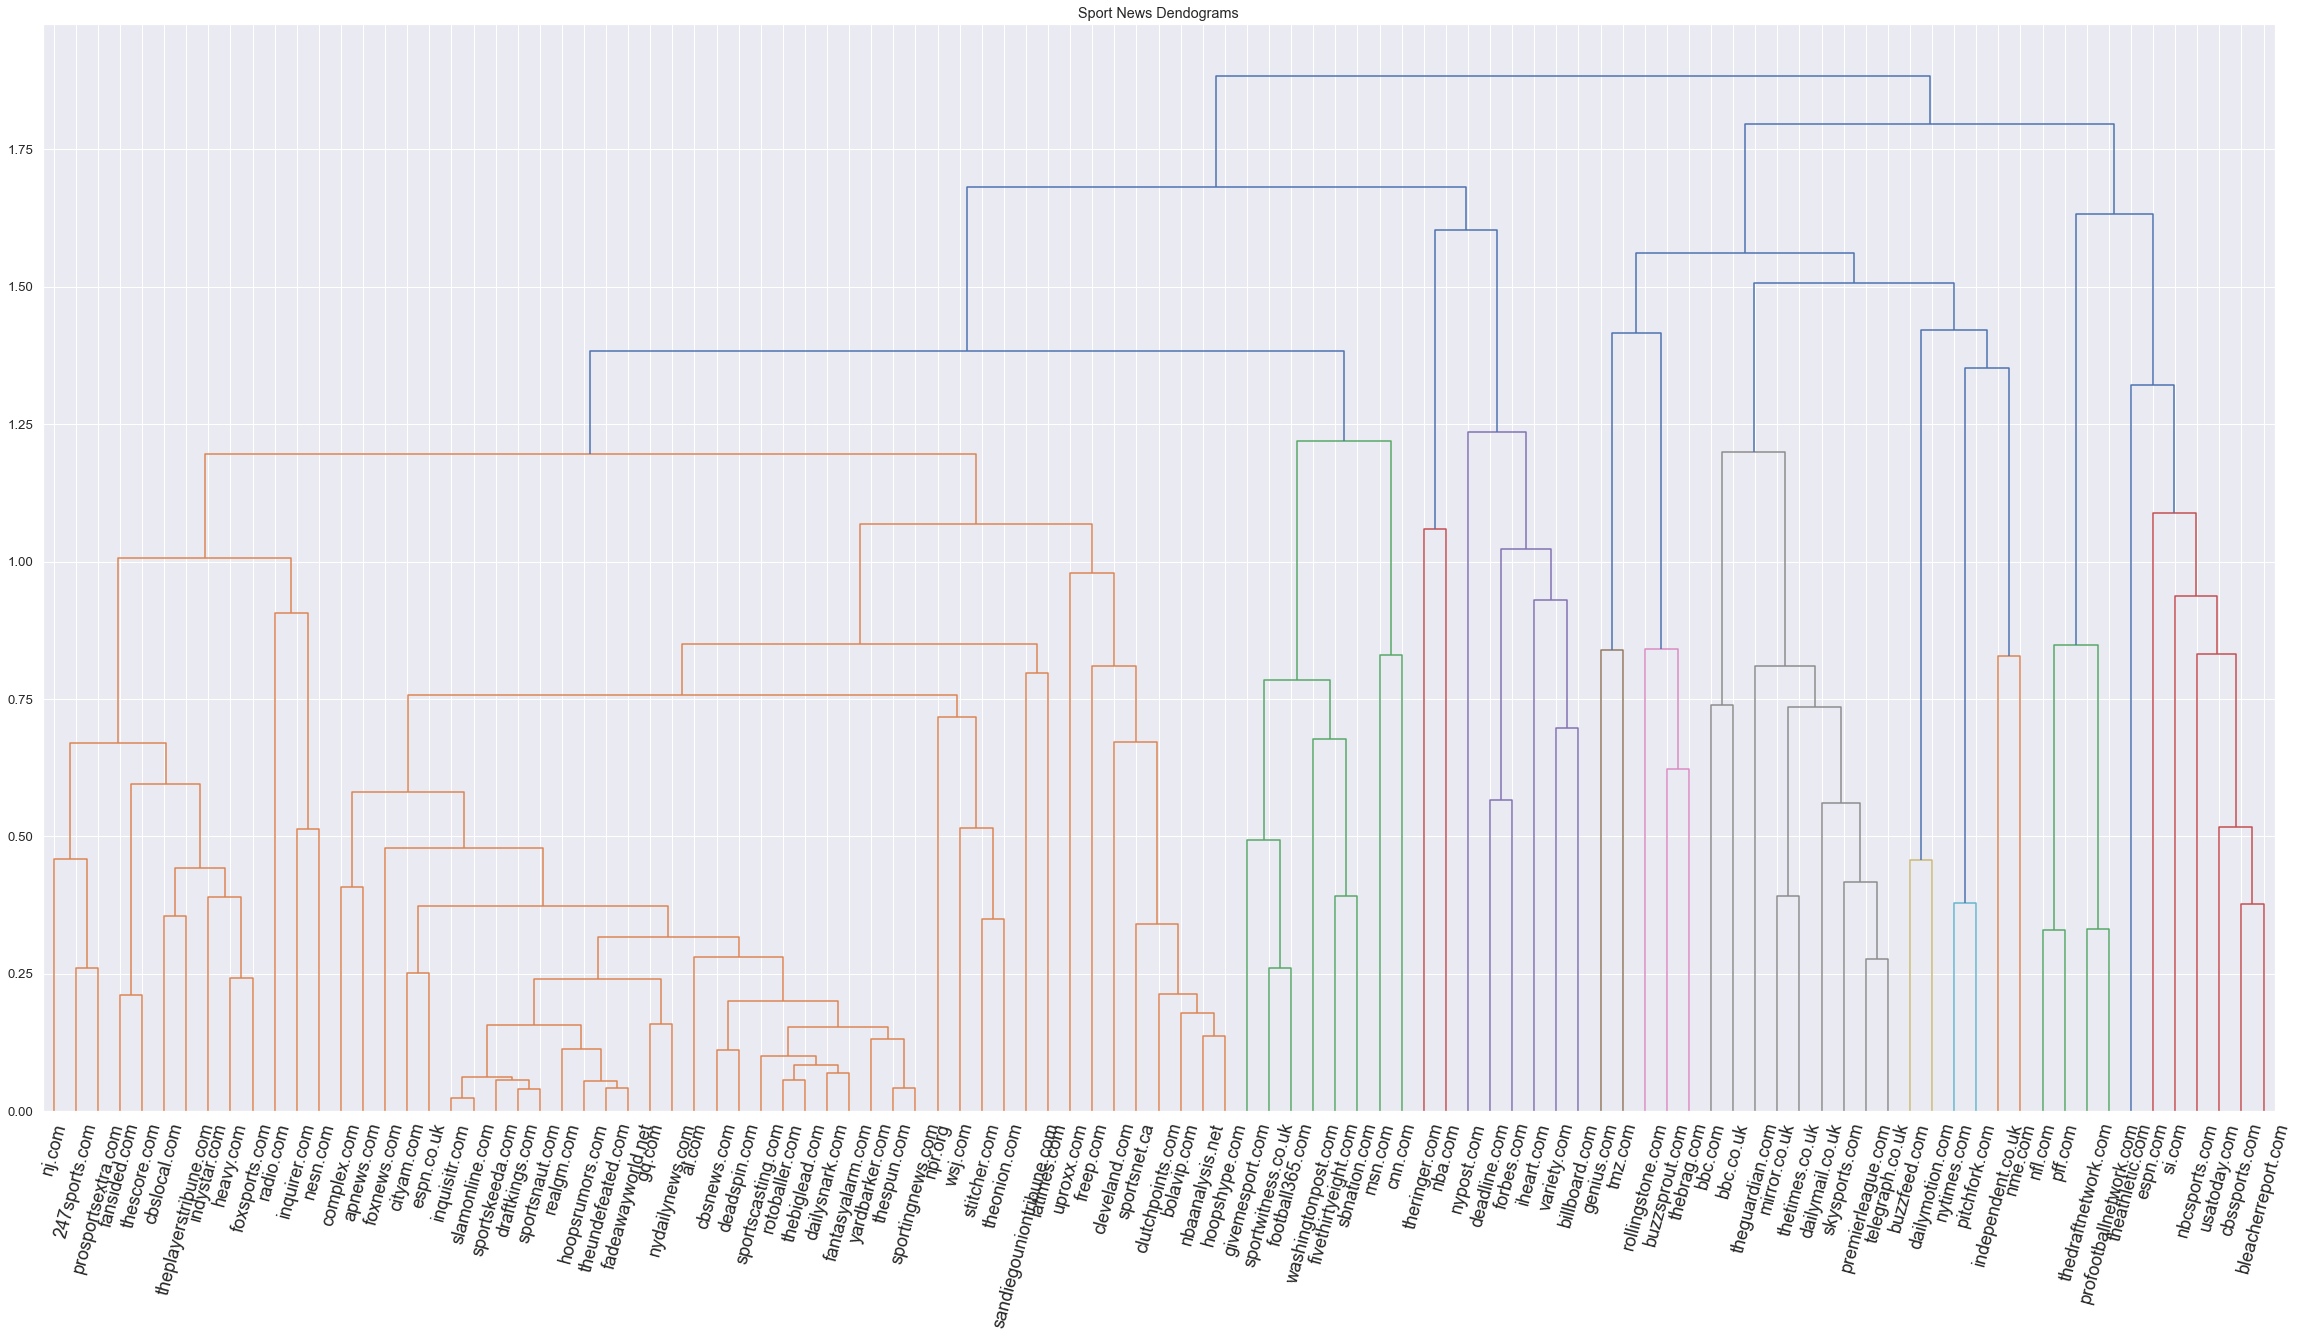

In [467]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(40, 20))
plt.title("Sport News Dendograms")
dend = shc.dendrogram(shc.linkage(preprocessing.normalize(np.array(ns_repr_new)), method='complete'),
                     labels = list(ns_sr_rep.keys()),
                     leaf_font_size = 18,
                     leaf_rotation = 75)

`centroid` distance metric bad

`single` has `nytimes.com`, `cnn.com`, `billboard.com`, `nme.com`, `forbes.com`, `rollingstone.com`, and `variety.com` in the same tree but not very distinct from the others.

`complete` is good as it has the outliers musics and UK sources in the same tree. The other tree is football and generic.

`average` is kinda good too but cluster for music is found after 5 cluster.

`median` yields weird tree.

`weighted`separates music and UK sources from sports in 4 clusters. But within sport itself not too much differences.

`ward` like `average` in that `genius.com` and `tmz.com` are clustered with 



In [522]:
"foxnews.com" in ns_union

True

## DBSCAN clustering

In [523]:
from sklearn.cluster import DBSCAN

First try out.

In [530]:
dbscan = DBSCAN(eps=0.2)

In [531]:
ds_clusters = dbscan.fit(ns_repr_new)

In [532]:
dbs_labels = ds_clusters.labels_
len(dbs_labels)

85

In [533]:
np.unique(dbs_labels)

array([-1], dtype=int64)

In [528]:
dbscan_clusters = defaultdict(list)
for idx, c in enumerate(list(dbs_labels)):
    dbscan_clusters[c].append(list(ns_sr_rep.keys())[idx])

In [529]:
for c in range(-1, len(np.unique(dbs_labels))+1):
    print("number of ns in cluster {}: {}".format(c, len(dbscan_clusters[c])))

number of ns in cluster -1: 85
number of ns in cluster 0: 0
number of ns in cluster 1: 0


Let's investigate some of the clusters

In [299]:
dbscan_clusters[9]

[]

In [300]:
dbscan_clusters[1]

[]

**Finding optimum `epsilon` for dbscan**

References: 

https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc

https://iopscience.iop.org/article/10.1088/1755-1315/31/1/012012/pdf

In [301]:
from sklearn.neighbors import NearestNeighbors

In [302]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(ns_repr)
distances, indices = nbrs.kneighbors(ns_repr)

(0.0, 0.01)

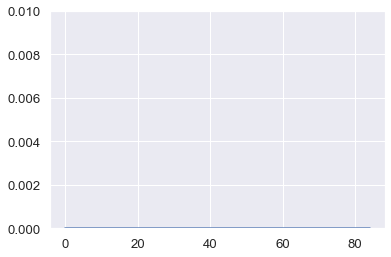

In [303]:
distances = np.sort(distances, axis=0)
# distances = distances[:,1]
plt.plot(distances)
plt.ylim((0,0.01))

I don't think any epsilon makes sense here.